In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Machine learing process:

Defining objectives

Collect data

Preparing data

Build machine learning model

Evaluate the machine learning model

Deploy machine learning model

**Objective**: Predicting car Prices

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv', index_col = 0)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [3]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.tail()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 17  bo

In [6]:
df.shape

(205, 25)

In [7]:
df.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [10]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [11]:
df_numeric = df.select_dtypes (exclude = ['object'])
df_numeric

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0


In [12]:
for col in df_numeric.columns:
  fig = px.scatter(data_frame = df_numeric,x=col, y='price', title=f'Scatter plot of {col} vs salePrice' )
  fig.show()

In [13]:
df.select_dtypes(include='object').columns


Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [14]:
df.select_dtypes(include='number').columns


Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [15]:
categorical_columns = [
    'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
    'fuelsystem'
]


df = pd.get_dummies(df, columns=categorical_columns, drop_first=True) # One-hot encode

print("Shape after encoding:", df.shape)
print(df.head())


Shape after encoding: (205, 190)
        symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
car_ID                                                                     
1               3       88.6      168.8      64.1       48.8        2548   
2               3       88.6      168.8      64.1       48.8        2548   
3               1       94.5      171.2      65.5       52.4        2823   
4               2       99.8      176.6      66.2       54.3        2337   
5               2       99.4      176.6      66.4       54.3        2824   

        enginesize  boreratio  stroke  compressionratio  ...  \
car_ID                                                   ...   
1              130       3.47    2.68               9.0  ...   
2              130       3.47    2.68               9.0  ...   
3              152       2.68    3.47               9.0  ...   
4              109       3.19    3.40              10.0  ...   
5              136       3.19    3.40             

In [16]:
df.shape

(205, 190)

In [17]:
# Calculate correlation of all features with SalePrice
correlations = df.corr()['price'].sort_values(ascending=False)
correlations.head(15)



price                                      1.000000
enginesize                                 0.874145
curbweight                                 0.835305
horsepower                                 0.808139
carwidth                                   0.759325
carlength                                  0.682920
drivewheel_rwd                             0.638957
wheelbase                                  0.577816
boreratio                                  0.553173
fuelsystem_mpfi                            0.517075
cylindernumber_six                         0.474978
enginetype_ohcv                            0.385991
enginelocation_rear                        0.324973
CarName_buick regal sport coupe (turbo)    0.282216
cylindernumber_five                        0.249606
Name: price, dtype: float64

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    correlations = df.corr()['price'].sort_values(ascending=False)
    print(correlations) # Temporarily changing display options for this cell only


price                                      1.000000
enginesize                                 0.874145
curbweight                                 0.835305
horsepower                                 0.808139
carwidth                                   0.759325
carlength                                  0.682920
drivewheel_rwd                             0.638957
wheelbase                                  0.577816
boreratio                                  0.553173
fuelsystem_mpfi                            0.517075
cylindernumber_six                         0.474978
enginetype_ohcv                            0.385991
enginelocation_rear                        0.324973
CarName_buick regal sport coupe (turbo)    0.282216
cylindernumber_five                        0.249606
CarName_bmw x5                             0.246328
CarName_buick century special              0.243209
CarName_porsche cayenne                    0.242095
carbody_hardtop                            0.225854
CarName_pors

In [19]:
print(len(correlations))


190


In [20]:
df.head(5)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


In [21]:
missing = df.isna().sum()
print(missing[missing > 0])


Series([], dtype: int64)


In [22]:
# Select train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [23]:
X = df.drop('price', axis = 1)
# X is the input, independent variable
Y = df['price']
# y is the value that we want to predict - dependent variable

In [24]:
X.shape, Y.shape

((205, 189), (205,))

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2
                                                    , random_state = 42
                                                    )

In [26]:
X_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
67,0,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,...,False,False,False,False,False,True,False,False,False,False
112,0,107.9,186.7,68.4,56.7,3075,120,3.46,2.19,8.4,...,False,False,False,False,False,False,False,True,False,False
154,0,95.7,169.7,63.6,59.1,2280,92,3.05,3.03,9.0,...,False,False,False,True,False,False,False,False,False,False
97,1,94.5,165.3,63.8,54.5,1971,97,3.15,3.29,9.4,...,False,False,False,True,False,False,False,False,False,False
39,0,96.5,167.5,65.2,53.3,2289,110,3.15,3.58,9.0,...,False,False,False,False,False,False,False,False,False,False


In [27]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((164, 189), (41, 189), (164,), (41,))

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Columns: 189 entries, symboling to fuelsystem_spfi
dtypes: bool(175), float64(7), int64(7)
memory usage: 59.1 KB


In [29]:
from sklearn.linear_model import LinearRegression # 1. Import the model
linear_regression = LinearRegression() # 2. Instantiate the model
linear_regression.fit(X_train, Y_train) #3. Fit the model on the training data.

LinearRegression()

In [30]:
pred = linear_regression.predict(X_test) # 4. Predict on the test

In [31]:
mean_absolute_error(Y_test, pred)


4177.2956313501545

In [32]:
mean_squared_error(Y_test, pred)  # Mean Squared Error


41547027.85277097

In [33]:
mse = mean_squared_error(Y_test, pred)  
rmse = np.sqrt(mse)                     
rmse

np.float64(6445.69839914737)

In [34]:
r2_score(Y_test, pred)  

0.47371533157520207

In [35]:
df2 = pd.read_csv('CarPrice_Assignment.csv', index_col = 0)
df2

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [36]:
X2 = df2.drop(columns=['price'])  # independent variables
y2 = df2['price']                 # target variable


In [37]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)


In [38]:
cat_columns = X2_train.select_dtypes(include='object').columns.tolist()
cat_columns


['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [39]:
cat_features = [X2_train.columns.get_loc(col) for col in cat_columns]
cat_features


[1, 2, 3, 4, 5, 6, 7, 13, 14, 16]

In [40]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(verbose=50, random_state=42)

catboost.fit(X2_train, y2_train, eval_set=(X2_test, y2_test),use_best_model=True,early_stopping_rounds=50,cat_features=cat_features,plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.038338
0:	learn: 7561.8985534	test: 8717.2452531	best: 8717.2452531 (0)	total: 153ms	remaining: 2m 32s
50:	learn: 2965.0170575	test: 3520.2265493	best: 3520.2265493 (50)	total: 1.22s	remaining: 22.8s
100:	learn: 1828.0988352	test: 2580.7306676	best: 2580.7306676 (100)	total: 2.4s	remaining: 21.4s
150:	learn: 1414.5929142	test: 2350.1693892	best: 2350.1693892 (150)	total: 3.51s	remaining: 19.7s
200:	learn: 1195.4532403	test: 2309.1798097	best: 2305.2161020 (197)	total: 4.6s	remaining: 18.3s
250:	learn: 1006.5848016	test: 2306.9325847	best: 2297.1797294 (212)	total: 5.71s	remaining: 17s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 2297.179729
bestIteration = 212

Shrink model to first 213 iterations.


In [41]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y2_test, pred)


4177.2956313501545

In [42]:
pred = catboost.predict(X2_test)

In [43]:
mse = mean_squared_error(y2_test, pred)
mse

5277034.675835814

In [44]:
rmse = np.sqrt(mse)
rmse

np.float64(2297.1797221453558)

In [45]:
r2 = r2_score(y2_test, pred)
r2

0.933154726386687

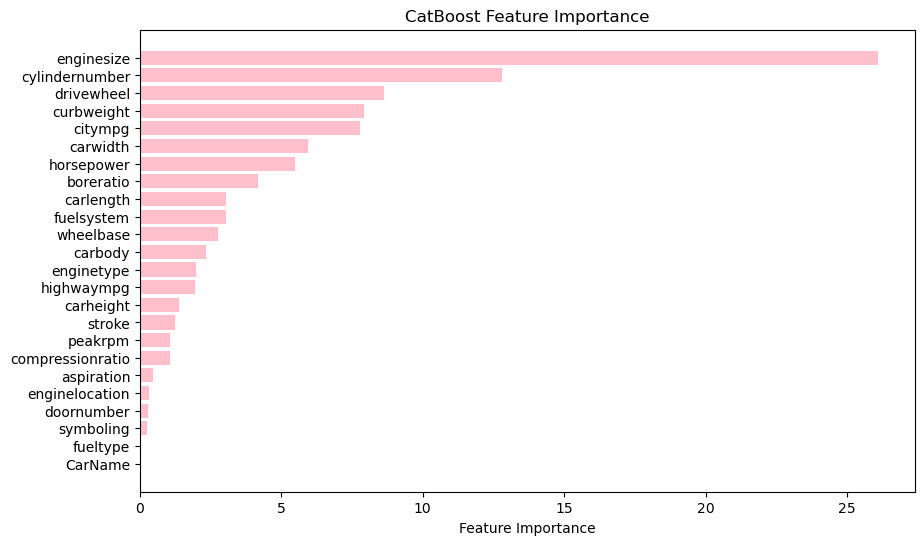

In [46]:

feature_importances = catboost.get_feature_importance()
features = X2_train.columns

fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(fi_df['Feature'], fi_df['Importance'], color='pink')
plt.xlabel("Feature Importance")
plt.title("CatBoost Feature Importance")

plt.savefig("catboost_feature_importance.png", dpi=300, facecolor='white')

plt.show()


In [47]:
sample_cars = X2_test.head(3)
predicted_prices = catboost.predict(sample_cars)
predicted_prices


array([31451.8441912 , 17157.54967464,  8492.58496442])

In [48]:
df2.columns 

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [49]:
df_new = pd.read_excel('car_sample_data.xlsx')
df_new

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,toyota corolla,gas,std,four,sedan,fwd,front,102,175,...,four,132,mpfi,3.47,3.39,10.0,132,6000,28,36
1,1,bmw 3-series,gas,turbo,four,sedan,rwd,front,110,182,...,six,2979,mpfi,3.35,3.46,10.2,255,5800,23,34
2,1,suzuki alto,gas,std,two,hatchback,fwd,front,93,141,...,three,796,2bbl,2.91,3.03,9.0,47,5000,35,40


In [50]:
df_new.shape

(3, 24)

In [51]:
predicted_prices = catboost.predict(df_new)
predicted_prices


array([12277.0250692 , 28702.97040176, 13368.51143533])

In [52]:
df_new['predicted_price'] = predicted_prices
df_new


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,predicted_price
0,0,toyota corolla,gas,std,four,sedan,fwd,front,102,175,...,132,mpfi,3.47,3.39,10.0,132,6000,28,36,12277.025069
1,1,bmw 3-series,gas,turbo,four,sedan,rwd,front,110,182,...,2979,mpfi,3.35,3.46,10.2,255,5800,23,34,28702.970402
2,1,suzuki alto,gas,std,two,hatchback,fwd,front,93,141,...,796,2bbl,2.91,3.03,9.0,47,5000,35,40,13368.511435


In [53]:
import joblib

In [54]:
mlr_model = linear_regression
mlr_model_filename = 'mlr_model.joblib' 
joblib.dump(mlr_model, mlr_model_filename) # (model I want to save, filename), # Another way.. joblib.dump(linear_regression, 'mlr_model.joblib')


['mlr_model.joblib']

In [55]:
catboost_model = catboost
catboost_model_filename = 'catboost_model.joblib'
joblib.dump(catboost_model, catboost_model_filename) # joblib.dump(catboost, 'catboost_model.joblib')


['catboost_model.joblib']

In [56]:
trial_prediction_data = df_new.drop(columns=['predicted_price'])

In [57]:
mj = joblib.load('catboost_model.joblib')

In [58]:
new_predicted_prices = mj.predict(trial_prediction_data) 
new_predicted_prices

array([12277.0250692 , 28702.97040176, 13368.51143533])

In [59]:
df.to_csv('mlr_training_data.csv', index=False)
df2.to_csv('catboost_training_data.csv', index=False)

In [60]:
import os
os.getcwd()


'C:\\Users\\HP\\My Projects\\Car Price Prediction'